In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os

# clean debit card statement

In [23]:
# If your CSV file has a header row and you want to use the first row as column names, you can specify it like this:
df = pd.read_csv("nov_checking.csv", index_col=False)

# remove Details, balance and check or slip # columns
df = df.drop(columns=['Details','Balance', 'Check or Slip #'])

# Rename the 'Posting Date' column to 'Date'
df = df.rename(columns={'Posting Date': 'Date'})

# rename Type column to Account
df = df.rename(columns={'Type': 'Account'})

# Change the data type of the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Create a new column 'Category' filled with NaN values
# insert memo column after description
df['Category'] = np.nan
df['Memo'] = np.nan

# Reorder the columns
column_order = ['Date', 'Description', 'Category', 'Amount', 'Account', 'Memo']
df = df[column_order]

# change all account values to be 5615
df['Account'] = 'Chase 5615'

# Filter and remove rows containing 'venmo' in 'Description'
df = df[~df['Description'].str.lower().str.contains('venmo')]
df = df[~df['Description'].str.lower().str.contains('chase credit')]

# Reset the index after filtering
df.reset_index(drop=True, inplace=True)

# Update 'Category' based on specific conditions in 'Description'
df.loc[df['Description'].str.contains('roundpoint', case=False), 'Category'] = 'Mortgage'
df.loc[df['Description'].str.contains('verizon', case=False), 'Category'] = 'Phone & Internet'
df.loc[df['Description'].str.contains('nivat|Divvy', case=False), 'Category'] = 'Income'
df.loc[df['Description'].str.contains('fid bkg|vanguard', case=False), 'Category'] = 'Investment'
df.loc[df['Description'].str.contains('City of Austin', case=False), 'Category'] = 'Utilities'
df.loc[df['Description'].str.contains('principal|CPS-LHC', case=False), 'Category'] = 'Insurance'
df.loc[df['Description'].str.contains('BANNOCKBURN', case=False), 'Category'] = 'Childcare'

df = df.sort_values(by='Date', ascending=True)
# Reset the index to maintain a continuous index
df.reset_index(drop=True, inplace=True)

# fill in blanks
# Replace a specific NaN value at row index 9 and 'Category' column
row_index = 9  # Replace NaN at this row index
column_name = 'Category'  # Replace NaN in this column

# Check if the cell contains a NaN value before replacement
if pd.isna(df.at[row_index, column_name]):
    df.at[row_index, column_name] = 'Other'


In [24]:
df

,Date,Description,Category,Amount,Account,Memo
0,2023-11-03,CPS-LHC Fxd Cost LHC Davis PP...,Insurance,-50.00,Chase 5615,NaN
1,2023-11-06,City of Austin T PAYMENT PP...,Utilities,-262.66,Chase 5615,NaN
2,2023-11-07,5005U552 NIVAT Payroll PP...,Income,2311.12,Chase 5615,NaN
3,2023-11-08,BANNOCKBURN BAPT SALE WE...,Childcare,-266.00,Chase 5615,NaN
4,2023-11-15,VANGUARD BUY INVESTMENT PP...,Investment,-500.00,Chase 5615,NaN
5,2023-11-17,PRINCIPAL-CCAPNL PRIN FINAN PP...,Insurance,-50.00,Chase 5615,NaN
6,2023-11-20,FID BKG SVC LLC MONEYLINE PP...,Investment,-500.00,Chase 5615,NaN
7,2023-11-22,5005U552 NIVAT Payroll PP...,Income,2311.12,Chase 5615,NaN
8,2023-11-27,FLAGSTAR LOAN PYMT 0472246860 WE...,NaN,-3020.98,Chase 5615,NaN
9,2023-11-28,VERIZON WIRELESS PAYMENTS PP...,Phone & Internet,-140.26,Chase 5615,NaN


# clean credit card statement

In [70]:
df2 = pd.read_csv("credit_a.csv", index_col=False)

# remove balance and check or slip # columns
df2 = df2.drop(columns=['Post Date'])

# go by Transaction Date
df2 = df2.rename(columns={'Transaction Date': 'Date'})

# Change the data type of the 'Date' column to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# rename type to account
df2 = df2.rename(columns={'Type': 'Account'})

# Switch the order of columns 'Account' and 'Amount'
df2 = df2[['Date', 'Description', 'Category', 'Amount', 'Account', 'Memo']]

# change all account values to be 9521
df2['Account'] = 'Chase 9521'

# Filter and remove rows containing 'AUTOMATIC' in 'Description'
df2 = df2[~df2['Description'].str.lower().str.contains('AUTOMATIC', case=False)]

#Update 'Category' based on specific conditions in 'Description'
df2.loc[df2['Description'].str.contains('SAGE BLOSSOM MASSAGE', case=False), 'Category'] = 'Subscription'
df2.loc[df2['Description'].str.contains('YouTubePremium', case=False), 'Category'] = 'Subscription'
df2.loc[df2['Description'].str.contains('crux', case=False), 'Category'] = 'Subscription'
df2.loc[df2['Description'].str.contains('spotify', case=False), 'Category'] = 'Subscription'
df2.loc[df2['Description'].str.contains('apple', case=False), 'Category'] = 'Subscription'
df2.loc[df2['Description'].str.contains('sphere', case=False), 'Category'] = 'Subscription'
df2.loc[df2['Description'].str.contains('vrdnt.farm', case=False), 'Category'] = 'Groceries'
df2.loc[df2['Description'].str.contains('fiber', case=False), 'Category'] = 'Phone & Internet'

In [71]:
df2.tail(40)

,Date,Description,Category,Amount,Account,Memo
26,2023-11-14,UNCOMMONGOODS,Shopping,-30.24,Chase 9521,NaN
27,2023-11-14,GOOGLE *YouTubePremium,Subscription,-15.14,Chase 9521,NaN
28,2023-11-13,R P*Casa Marianella,Gifts & Donations,-25.00,Chase 9521,NaN
29,2023-11-14,Amazon.com*UY44C2CO3,Shopping,-15.14,Chase 9521,NaN
30,2023-11-14,AMZN Mktp US*276LX1AV3,Shopping,-10.81,Chase 9521,NaN
31,2023-11-14,AMZN Mktp US*GT9AL3XE3,Shopping,-23.79,Chase 9521,NaN
32,2023-11-13,TARGET 00000968,Shopping,16.23,Chase 9521,NaN
33,2023-11-12,SCHLOTZSKYS #101453,Food & Drink,-30.57,Chase 9521,NaN
34,2023-11-12,TST* THE ARISTOCRAT LOUNG,Food & Drink,-13.00,Chase 9521,NaN
35,2023-11-13,WP*vrdnt.farm,Groceries,-25.00,Chase 9521,NaN


# append csv to master csv

In [88]:
# Save the modified DataFrame as the new file
df2.to_csv('master.csv', index=False)

In [89]:
# this should match the file name above
new_data = pd.read_csv('credit_a.csv')

# Assuming you have an existing 'master.csv' file
existing_data = pd.read_csv('master.csv')

# Append the new data to the existing data
master = pd.concat([existing_data, new_data], ignore_index=True)

# Save the merged data to 'master.csv'
master.to_csv('master.csv', index=False)

# Convert the 'Date' column to datetime data type
master['Date'] = pd.to_datetime(master['Date'])


# check added data and duplicates

In [90]:
# check if the new df has been added at the bottom
master.sort_values('Date').tail(20)

,Date,Description,Category,Amount,Account,Memo
1545,2023-11-26,WWW.NATIONALCASAGAL.OR,Gifts & Donations,-25.00,Chase 9521,NaN
1544,2023-11-26,BARNES&amp;NOBLE #2267,Gifts & Donations,-31.89,Chase 9521,NaN
1546,2023-11-27,FLAGSTAR LOAN PYMT 0472246860 WE...,Mortgage,-3020.98,Chase 5615,NaN
1563,2023-11-27,LAMBS TIRE #4001,Other,-52.04,Chase 9521,NaN
1547,2023-11-27,LAMBS TIRE #4001,Other,-52.04,Chase 9521,NaN
1548,2023-11-27,vrdnt.farm,Groceries,-25.00,Chase 9521,NaN
1565,2023-11-27,vrdnt.farm,Groceries,-25.00,Chase 9521,NaN
1549,2023-11-28,VERIZON WIRELESS PAYMENTS PP...,Phone & Internet,-140.26,Chase 5615,NaN
1551,2023-11-28,H-E-B ONLINE #108,Groceries,-115.99,Chase 9521,NaN
1550,2023-11-28,AFRICA NEW LIFE MINISTRIE,Gifts & Donations,-39.00,Chase 9521,NaN


In [92]:
# Check for duplicate rows
duplicates = master.duplicated()

# Display matching rows (duplicates)
matching_rows = master[duplicates]
print(matching_rows)

           Date                Description           Category  Amount  \
565  2023-01-11                TST* Henbit      Entertainment   -6.50   
971  2023-05-09            METRO BARCELONA             Travel  -22.11   
1557 2023-11-30            BURRITO FACTORY       Food & Drink  -10.58   
1558 2023-11-29      TST* HILLSIDE FARMACY       Food & Drink  -19.85   
1559 2023-11-28  AFRICA NEW LIFE MINISTRIE  Gifts & Donations  -39.00   
...         ...                        ...                ...     ...   
1617 2023-11-02                H-E-B  #428          Groceries -141.03   
1618 2023-11-01   FSP*CRUX CLIMBING CENTER       Subscription -202.41   
1619 2023-11-02             ACTBLUE* NAACP  Gifts & Donations  -25.00   
1620 2023-10-31      TST* Parker Jazz Club  Gifts & Donations  -50.00   
1621 2023-10-28  AFRICA NEW LIFE MINISTRIE  Gifts & Donations  -39.00   

         Account Memo  
565   Chase 6451  NaN  
971   Chase 9521  NaN  
1557  Chase 9521  NaN  
1558  Chase 9521  NaN  
155

# filters

In [106]:
# Filter by month and account type
filter_month = master[(master['Date'].dt.month == 9) & (master['Date'].dt.year == 2023) & (master['Account'] == 'Chase 9521')]
filter_month

,Date,Description,Category,Amount,Account,Memo
1315,2023-09-01,CRUX CLIMBING CENTER,Subscription,-134.94,Chase 9521,NaN
1316,2023-09-02,ACTBLUE* NAACP,Gifts & Donations,-25.00,Chase 9521,NaN
1317,2023-09-02,CHEVRON 0175382,Gas,-40.88,Chase 9521,NaN
1318,2023-09-03,TST* Hai Ky Restaurant,Food & Drink,-33.37,Chase 9521,NaN
1319,2023-09-03,H-E-B #428,Groceries,-163.53,Chase 9521,NaN
...,...,...,...,...,...,...
1390,2023-09-29,H-E-B #428,Groceries,-43.55,Chase 9521,NaN
1391,2023-09-29,COSTCO WHSE #0641,Shopping,-64.46,Chase 9521,NaN
1393,2023-09-30,Crickles &amp; Co,Food & Drink,-27.54,Chase 9521,NaN
1394,2023-09-30,AMZN Mktp US*T92GU15R2,Shopping,-50.98,Chase 9521,NaN


In [103]:
# Filter rows with 'youtube' in the 'Description' column
filter_rows = master[master['Description'].str.contains('sage', case=False)]
filter_rows

,Date,Description,Category,Amount,Account,Memo
634,2023-01-30,SAGE BLOSSOM MASSAGE,Subscription,-100.0,Chase 9521,NaN
714,2023-02-27,SAGE BLOSSOM MASSAGE,Subscription,-100.0,Chase 9521,NaN
828,2023-03-27,SAGE BLOSSOM MASSAGE,Subscription,-123.0,Chase 9521,$100 to be reimbursed by Nivati
917,2023-04-27,SAGE BLOSSOM MASSAGE,Subscription,-123.0,Chase 9521,NaN
1039,2023-05-27,SAGE BLOSSOM MASSAGE,Subscription,-123.0,Chase 9521,Massage
1139,2023-06-27,SAGE BLOSSOM MASSAGE,Subscription,-123.0,Chase 9521,NaN
1225,2023-07-27,SAGE BLOSSOM MASSAGE,Subscription,-123.0,Chase 9521,NaN
1303,2023-08-27,SAGE BLOSSOM MASSAGE,Subscription,-123.0,Chase 9521,NaN
1384,2023-09-27,SAGE BLOSSOM MASSAGE,Subscription,-123.0,Chase 9521,NaN


# delete csv

In [105]:
# List of file names to be deleted
files_to_delete = ['credit_a.csv']

# Iterate through the list and delete each file
for file_name in files_to_delete:
    if os.path.exists(file_name):
        os.remove(file_name)
        print(f"{file_name} has been deleted.")
    else:
        print(f"{file_name} does not exist.")


credit_a.csv has been deleted.


# analysis

In [94]:
master = pd.read_csv('master.csv')
master['Date'] = pd.to_datetime(master['Date'])
master

,Date,Description,Category,Amount,Account,Memo
0,2022-08-01,REMOTE ONLINE DEPOSIT # 1,Income,4322.83,Chase 5615,NaN
1,2022-08-01,CRUX CLIMBING CENTER,Subscription,-139.64,Chase 9521,NaN
2,2022-08-02,FID BKG SVC LLC MONEYLINE PPD ID: 0368004600,Investment,-1000.00,Chase 5615,NaN
3,2022-08-02,EXXONMOBIL 47949052,Gas,-31.16,Chase 9521,NaN
4,2022-08-02,ACTBLUE*NAACP,Gifts & Donations,-25.00,Chase 9521,NaN
...,...,...,...,...,...,...
1552,2023-11-29,CHEVRON 0175382,Gas,-34.74,Chase 6451,NaN
1553,2023-11-29,AUS HUMANE SOCIETY,Gifts & Donations,-50.00,Chase 6451,NaN
1554,2023-11-29,TST* HILLSIDE FARMACY,Food & Drink,-19.85,Chase 9521,NaN
1555,2023-11-29,SHUTTERFLY INC.,Shopping,-137.69,Chase 9521,NaN


In [95]:
# Filter the DataFrame to include only dates in the year 2023
df_2023 = master[(master['Date'] >= '2023-01-01') & (master['Date'] <= '2023-12-31')]

# Group by 'Month' and 'Category' and perform aggregation (e.g., sum of 'Amount')
monthly_category_summary = df_2023.groupby([df_2023['Date'].dt.to_period('M'), 'Category']).agg({'Amount': 'sum'})

# Reset the index to make 'Date' a column again
monthly_category_summary.reset_index(inplace=True)

# Display the summary with monthly totals for 
monthly_category_summary


,Date,Category,Amount
0,2023-01,Business,-76.76
1,2023-01,Education,-20.00
2,2023-01,Entertainment,-364.25
3,2023-01,Food & Drink,-257.71
4,2023-01,Gas,-94.45
...,...,...,...
173,2023-11,Phone & Internet,-210.26
174,2023-11,Shopping,-244.54
175,2023-11,Subscription,-194.97
176,2023-11,Travel,-20.00


In [108]:
pivoted = pd.pivot_table(monthly_category_summary, index='Category', columns='Date',values='Amount', aggfunc=sum, margins=True, margins_name='Total')

pivoted

Date,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,Total
Category,,,,,,,,,,,,
Business,-76.76,-68.49,-88.49,-75.36,-10.56,-10.22,-10.22,-0.27,NaN,-9.95,NaN,-350.32
Childcare,NaN,-308.55,-375.00,NaN,NaN,NaN,34.00,NaN,-266.00,-296.95,-266.00,-1478.50
Education,-20.00,NaN,NaN,NaN,-10.23,NaN,-20.00,2977.00,-3813.41,-8.05,-26.46,-921.15
Entertainment,-364.25,-81.25,NaN,NaN,NaN,NaN,-53.45,-199.49,NaN,NaN,-30.00,-728.44
Food & Drink,-257.71,-245.30,-234.02,-138.27,-47.73,-193.15,-105.31,-126.43,-84.76,-26.59,-118.41,-1577.68
Gas,-94.45,-96.77,-91.37,-34.65,-94.22,-67.66,-173.83,-174.77,-237.35,-206.34,-210.24,-1481.65
Gifts & Donations,51.75,-575.57,-364.87,-339.87,-533.57,-506.50,-339.87,-701.42,-179.87,-396.87,-371.76,-4258.42
Groceries,-638.70,-777.51,-831.19,-447.93,-590.48,-652.95,-787.60,-641.78,-1293.37,-1071.07,-796.93,-8529.51
Income,4009.56,5241.23,6087.09,2394.67,2789.35,4557.98,4267.47,4722.24,4722.25,4722.24,4622.24,48136.32


<Figure size 1000x600 with 0 Axes>

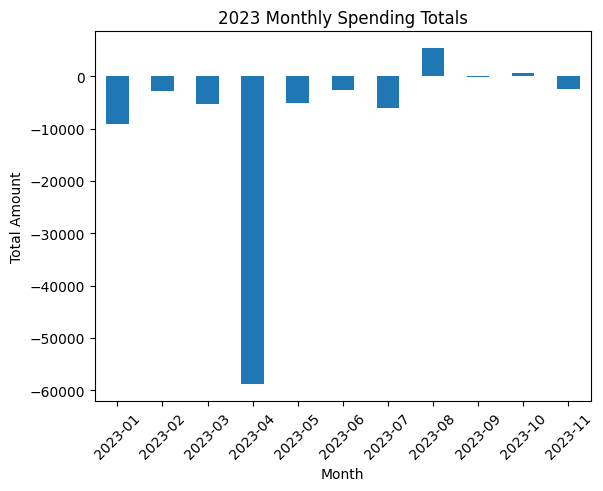

In [109]:
# Filter data for the year 2023
master_2023 = master[master['Date'].dt.year == 2023]

# Group by month and sum the 'Amount'
monthly_totals = master_2023.groupby(master_2023['Date'].dt.to_period('M')).agg({'Amount': 'sum'})

# Plotting
plt.figure(figsize=(10, 6))
monthly_totals.plot(kind='bar', legend=None)
plt.title('2023 Monthly Spending Totals')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

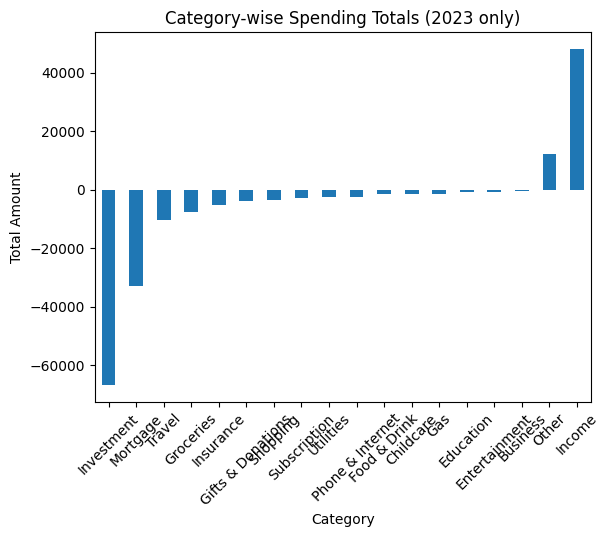

In [59]:
# Group by 'Category' and sum the 'Amount'
category_totals = master_2023.groupby('Category').agg({'Amount': 'sum'})

# Sort categories from highest to lowest
category_totals = category_totals.sort_values(by='Amount', ascending=True)

# Plotting
plt.figure(figsize=(12, 8))
category_totals.plot(kind='bar', legend=None)
plt.title('Category-wise Spending Totals (2023 only)')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

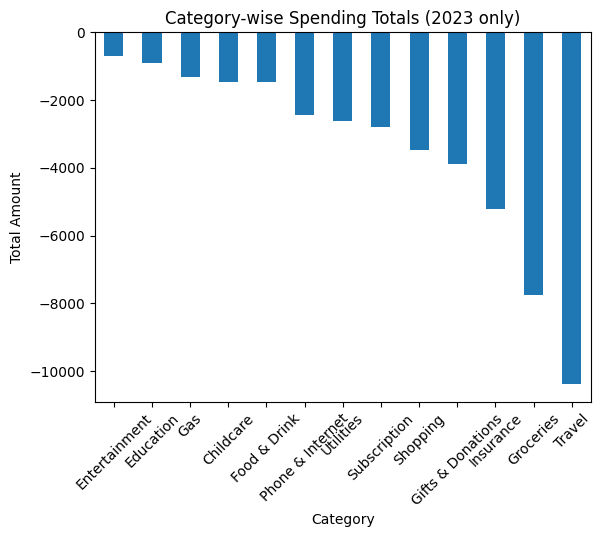

In [62]:
# Exclude specific categories
exclude_categories = ['Income', 'Mortgage', 'Investment','Other','Business']
filtered_category_totals = master_2023[~master_2023['Category'].isin(exclude_categories)]

# Group by 'Category' and sum the 'Amount'
category_totals = filtered_category_totals.groupby('Category').agg({'Amount': 'sum'})

# Sort categories from highest to lowest
category_totals = category_totals.sort_values(by='Amount', ascending=False)

# Plotting with wider size
plt.figure(figsize=(12, 8))
category_totals.plot(kind='bar', legend=None)
plt.title('Category-wise Spending Totals (2023 only)')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

In [111]:
# githubt test
# new filter
filter_rows = master[master['Category'].str.contains('Shopping', case=False)]
filter_rows

,Date,Description,Category,Amount,Account,Memo
15,2022-08-06,AMZN Mktp US,Shopping,20.56,Chase 9521,NaN
26,2022-08-09,AMZN Mktp US*PS2660EG3,Shopping,-14.06,Chase 6451,NaN
27,2022-08-09,AMZN Mktp US*KV0B181B3,Shopping,-10.81,Chase 6451,NaN
30,2022-08-10,SP GOODBUY GEAR,Shopping,-200.20,Chase 6451,NaN
34,2022-08-12,THROCKMORTON'S,Shopping,-43.30,Chase 9521,NaN
...,...,...,...,...,...,...
1521,2023-11-14,UNCOMMONGOODS,Shopping,-30.24,Chase 9521,NaN
1523,2023-11-14,Amazon.com*UY44C2CO3,Shopping,-15.14,Chase 9521,NaN
1524,2023-11-14,AMZN Mktp US*276LX1AV3,Shopping,-10.81,Chase 9521,NaN
1525,2023-11-14,AMZN Mktp US*GT9AL3XE3,Shopping,-23.79,Chase 9521,NaN
